In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random #?

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #Učitava 60 000 slika u train varijable i 10 000 u test podatke. 
#I pridjeljuje im pripadne oznake.
 
print(X_train.shape)
print(X_test.shape) # Svaka slika je 28x28 piksela.
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [4]:
#Assert funkcija pomaže pri verificranju ispravnosti učitanih podatka
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

In [5]:
#Sada crtamo i analiziramo podatke
#num_of_samples = [] #Prazna lista koja će biti korištena za bilježenje 
 
#cols = 5 #Označava pet stupaca od po 10 redova u kojima su brojevi od 0 do 9
#num_classes = 10 #Deset klasa, tj. deset različitih brojeva
 
#fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(10, 10)) #Subplot omogućuje crtanje više sika na jednu
#Funkcija sublots vraća dvije vrijednosti koje spremam u varijable fig i axs
#fig kao instanca na sliku a axs osi slike (!?)
#nrows - broj redova mreže koji je jednak broju klasa, tj. 10

#figsize - definiramo veličinu slike
#Do ovog dijela ispisuje se samo mreža, bez brojeva u njoj. Brojeve, tj. slike brojeva moramo učitati.
#fig.tight_layout() #Uklanja preklapanja linija na slici, uglavnom, sređuje sliku


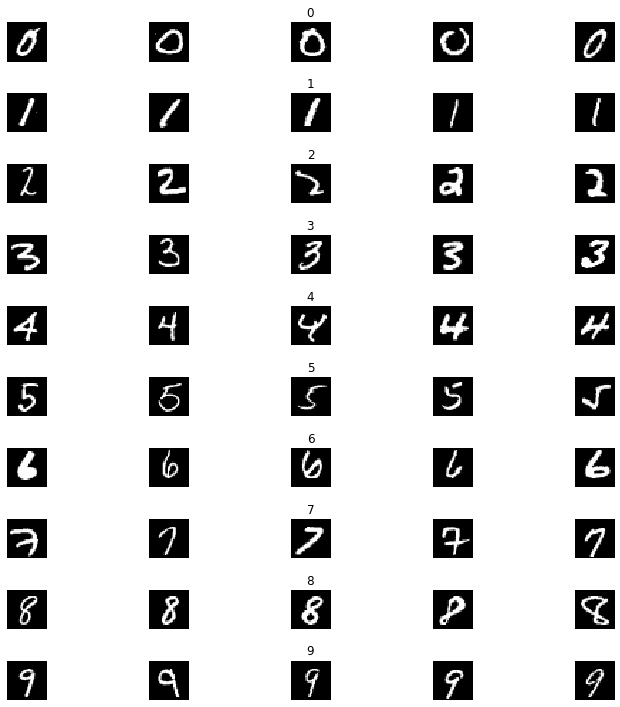

In [6]:
#Sada crtamo i analiziramo podatke
num_of_samples = [] #Prazna lista koja će biti korištena za bilježenje 
 
cols = 5 #Označava pet stupaca od po 10 redova u kojima su brojevi od 0 do 9
num_classes = 10 #Deset klasa, tj. deset različitih brojeva
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(10, 10)) #Subplot omogućuje crtanje više sika na jednu
#Funkcija sublots vraća dvije vrijednosti koje spremam u varijable fig i axs
#fig kao instanca na sliku a axs osi slike (!?)
#nrows - broj redova mreže koji je jednak broju klasa, tj. 10

#figsize - definiramo veličinu slike
#Do ovog dijela ispisuje se samo mreža, bez brojeva u njoj. Brojeve, tj. slike brojeva moramo učitati.

fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

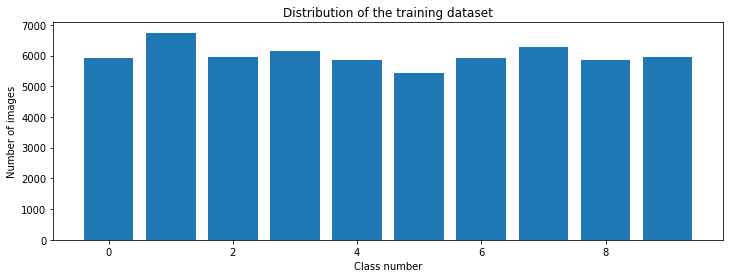

In [7]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.6275 - accuracy: 0.8031 - val_loss: 0.3170 - val_accuracy: 0.9062
Epoch 2/10
54000/54000 [=========================

KeyError: 'val_acc'

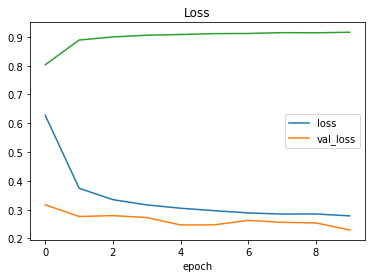

In [8]:
#Sada je potrebno pripremiti podatke za treniranje, počinjemo sa kodiranjem

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255 
X_test = X_test/255 # Normaliziram označavanje intenziteta boje piksela između 0 i 1. To radimo u svrhu smanjena varijance.
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels) #Prebacujemo trening podatke u array koji ima samo jedan red.
#Laički rečeno, svaki red poredamo jedan do drugog.
X_test = X_test.reshape(X_test.shape[0], num_pixels)
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
 
model = create_model()
print(model.summary())
 
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)
 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
 
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])